In [9]:
import os
import pandas as pd

# Directorio donde se encuentran los archivos Excel
directorio = 'Datos\\'

# Obtener la lista de archivos en el directorio
archivos = os.listdir(directorio)

# Inicializar una lista para almacenar los DataFrames de cada archivo
dfs = []

# Iterar sobre cada archivo en el directorio
for archivo in archivos:
    if archivo.endswith('.xlsx'):  # Verificar si es un archivo Excel
        # Construir la ruta completa al archivo
        ruta_completa = os.path.join(directorio, archivo)
        # Leer el archivo Excel en un DataFrame
        df = pd.read_excel(ruta_completa)
        # Agregar el DataFrame a la lista
        dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

# Mostrar el DataFrame final
print(df_final)


             Fecha Clave IBM                     Central Energético principal  \
0       01.01.2013       PLD         C T Puerto Libertad                  CBO   
1       01.01.2013       PGD          C T  C Rodríguez R                  CBO   
2       01.01.2013       TPO             C T Topolobampo                  CBO   
3       01.01.2013       MZD           C T José Aceves P                  CBO   
4       01.01.2013       ICA               C T G Caborca                  DSL   
...            ...       ...                         ...                  ...   
261427  31.12.2018       SJC        CFE-TM27-2500-SJC-U1                  DSL   
261428  31.12.2018       GJD      GUERRERO NEGRO JET DOS                  DSL   
261429  31.12.2018       JSD        TJ SANTA ROSALIA DOS                  DSL   
261430  31.12.2018       NaN  CFE-UME-16 SRI (UNIDAD 20)                  DSL   
261431  31.12.2018       NaN  CFE-UME-16 SRI (UNIDAD 18)                  DSL   

        Consumo CBO (M3)  C

In [10]:
# Filtrar el DataFrame para obtener solo los datos de la clave 'PLD'
df_pld = df_final[df_final['Clave IBM'] == 'PLD']

# Ordenar el DataFrame filtrado por el campo "Fecha"
df_pld_ordenado = df_pld.sort_values(by='Fecha')

# Mostrar el DataFrame ordenado
print(df_pld_ordenado)


             Fecha Clave IBM              Central Energético principal  \
0       01.01.2013       PLD  C T Puerto Libertad                  CBO   
41917   01.01.2014       PLD  C T Puerto Libertad                  CBO   
85169   01.01.2015       PLD  C T Puerto Libertad                  CBO   
129123  01.01.2016       PLD  C T Puerto Libertad                  CBO   
173978  01.01.2017       PLD  C T Puerto Libertad                  CBO   
...            ...       ...                  ...                  ...   
85047   31.12.2014       PLD  C T Puerto Libertad                  CBO   
129000  31.12.2015       PLD  C T Puerto Libertad                  CBO   
173856  31.12.2016       PLD  C T Puerto Libertad                  CBO   
218081  31.12.2017       PLD  C T Puerto Libertad                  CBO   
261314  31.12.2018       PLD  C T Puerto Libertad                  CBO   

        Consumo CBO (M3)  Consumo CBO (GJ)  Consumo DSL (M3)  \
0               1741.189         71705.341     

In [1]:
import os
import numpy as np
import pandas as pd
os.environ['NIXTLA_ID_AS_COL'] = '1'

In [2]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF
from statsforecast.models import AutoETS
from statsforecast.utils import AirPassengers as ap
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)


c:\Users\uriel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
c:\Users\uriel\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [3]:
Y_df = AirPassengersDF
Y_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


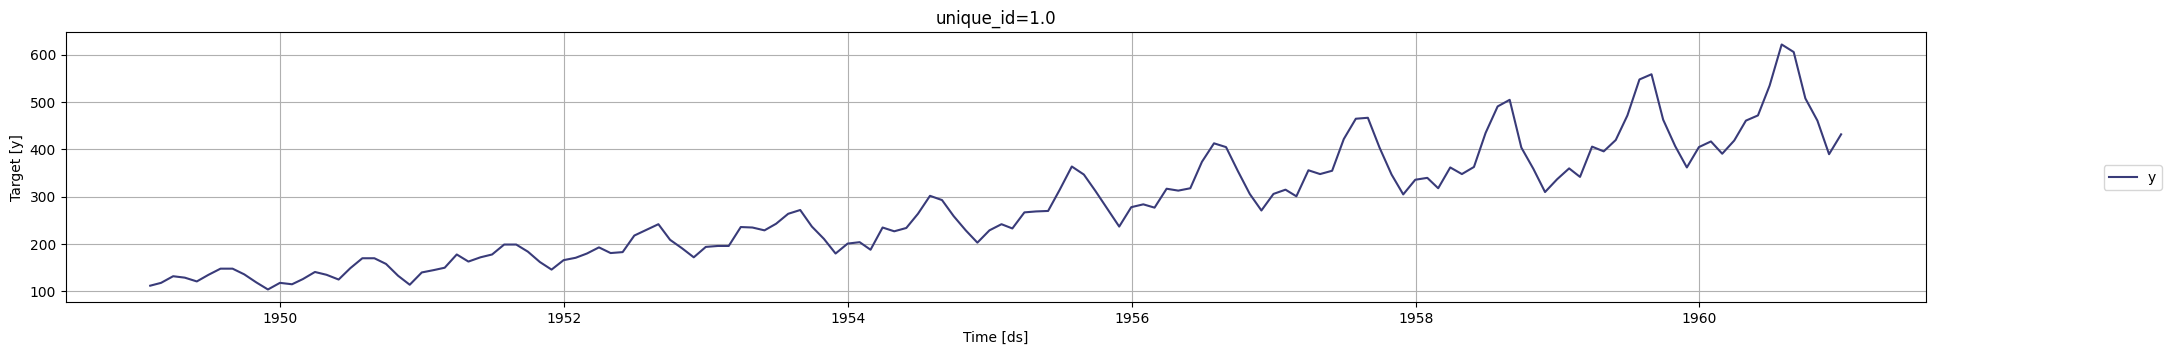

In [4]:
StatsForecast.plot(Y_df)

In [6]:
# Create a list of models and instantiation parameters
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]


In [9]:
# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq='D', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)


In [10]:
forecasts_df = sf.forecast(df=Y_df, h=48, level=[90])
forecasts_df.head()


,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
0,1.0,1961-01-01,535.0,198.991135,871.00885,535.0,198.991135,871.00885,360.0,201.737503,518.262512,280.298615,82.287605,478.309631,432.261993,381.322815,496.512512
1,1.0,1961-01-02,622.0,285.991150,958.00885,622.0,285.991150,958.00885,342.0,183.737503,500.262512,280.298615,82.287605,478.309631,432.927155,355.926270,513.345886
2,1.0,1961-01-03,606.0,269.991150,942.00885,606.0,269.991150,942.00885,406.0,247.737503,564.262512,280.298615,82.287605,478.309631,433.589386,321.956238,528.776672
3,1.0,1961-01-04,508.0,171.991135,844.00885,508.0,171.991135,844.00885,396.0,237.737503,554.262512,280.298615,82.287605,478.309631,434.248688,321.280090,531.464111
4,1.0,1961-01-05,461.0,124.991142,797.00885,461.0,124.991142,797.00885,420.0,261.737488,578.262512,280.298615,82.287605,478.309631,434.905029,318.645264,552.497803


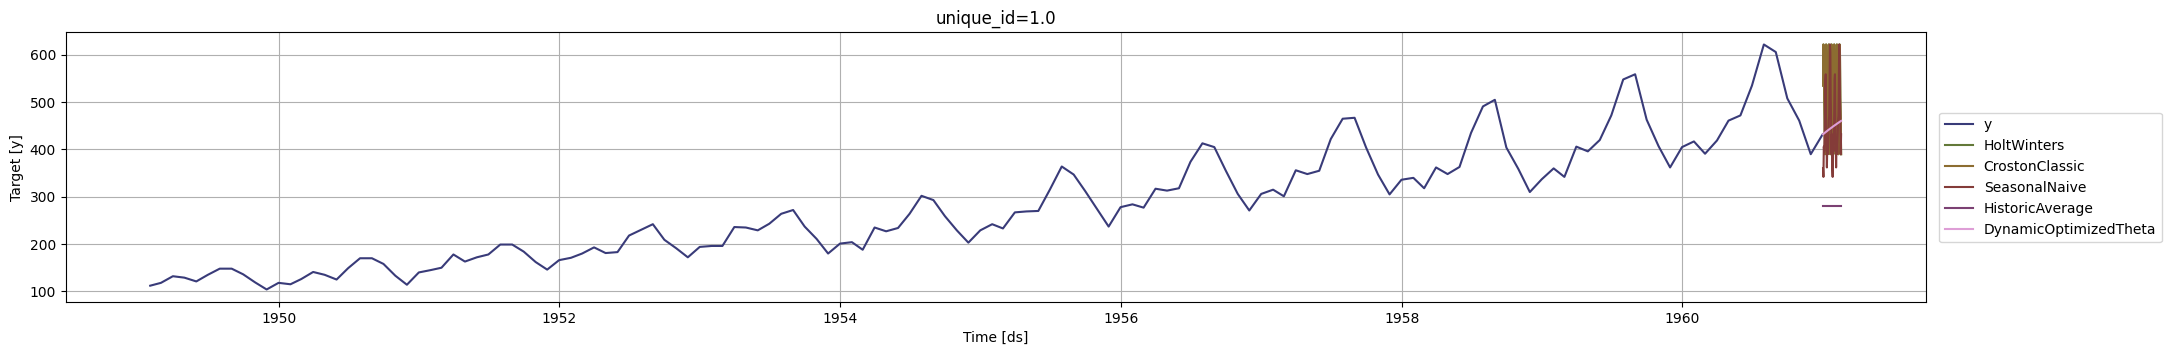

In [11]:
sf.plot(Y_df,forecasts_df)

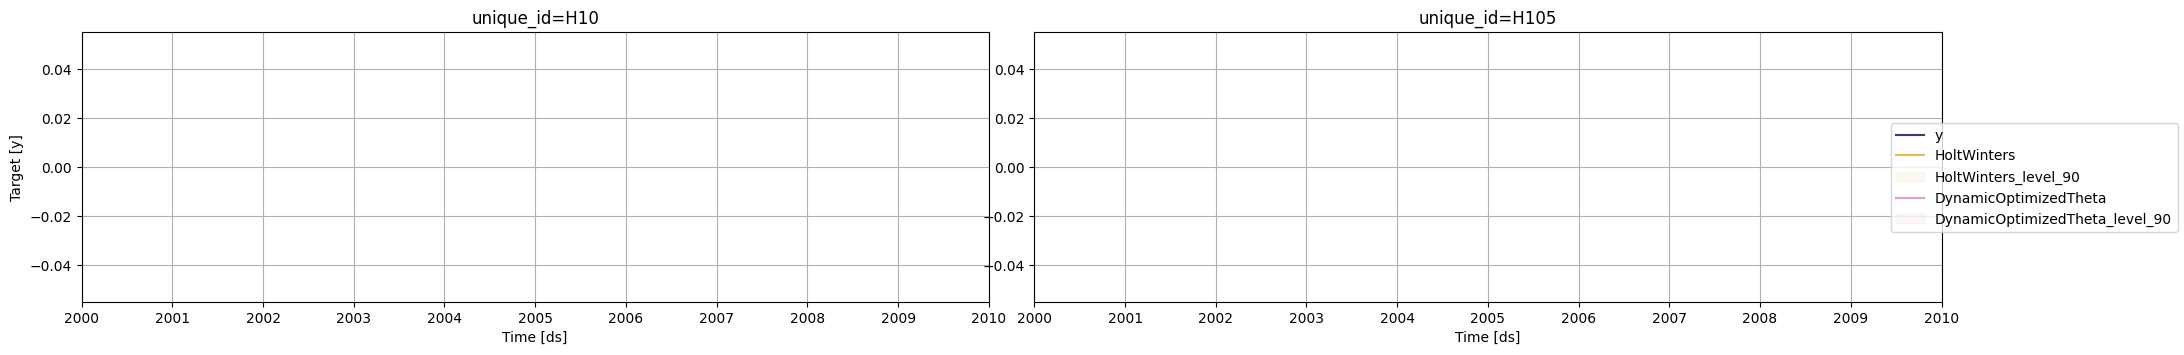

In [12]:
# Plot to unique_ids and some selected models
sf.plot(Y_df, forecasts_df, models=["HoltWinters","DynamicOptimizedTheta"], unique_ids=["H10", "H105"], level=[90])


In [13]:
crossvaldation_df = sf.cross_validation(
    df=Y_df,
    h=24,
    step_size=24,
    n_windows=2
)


In [14]:
from utilsforecast.losses import mse
from utilsforecast.evaluation import evaluate


In [15]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals


In [17]:
evaluation_df = evaluate_cross_validation(crossvaldation_df, mse)
evaluation_df.head()


,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
unique_id,,,,,,
1.0,12369.9375,9566.027344,5950.0625,38779.390625,13478.704102,SeasonalNaive
